In [1]:
#Import relevenat libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

In [3]:
# Read Data

In [4]:
credit = pd.read_csv('clean_data.csv')

In [5]:
credit.head(15)

,Unnamed: 0,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,limit,sex,education,marriage,age
0,0,2,2,0,0,0,0,3913,3102,689,...,0,0,0,0,default,20000,female,university,1,24
1,1,0,2,0,0,0,2,2682,1725,2682,...,1000,1000,0,2000,default,120000,female,university,2,26
2,2,0,0,0,0,0,0,29239,14027,13559,...,1000,1000,1000,5000,not default,90000,female,university,2,34
3,3,0,0,0,0,0,0,46990,48233,49291,...,1200,1100,1069,1000,not default,50000,female,university,1,37
4,4,0,0,0,0,0,0,8617,5670,35835,...,10000,9000,689,679,not default,50000,male,university,1,57
5,5,0,0,0,0,0,0,64400,57069,57608,...,657,1000,1000,800,not default,50000,male,graduate school,2,37
6,6,0,0,0,0,0,0,367965,412023,445007,...,38000,20239,13750,13770,not default,500000,male,graduate school,2,29
7,7,0,0,0,0,0,0,11876,380,601,...,0,581,1687,1542,not default,100000,female,university,2,23
8,8,0,0,2,0,0,0,11285,14096,12108,...,432,1000,1000,1000,not default,140000,female,high school,1,28
9,9,0,0,0,0,0,0,0,0,0,...,0,13007,1122,0,not default,20000,male,high school,2,35


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29886 entries, 0 to 29885
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  29886 non-null  int64 
 1   PAY_0       29886 non-null  int64 
 2   PAY_2       29886 non-null  int64 
 3   PAY_3       29886 non-null  int64 
 4   PAY_4       29886 non-null  int64 
 5   PAY_5       29886 non-null  int64 
 6   PAY_6       29886 non-null  int64 
 7   BILL_AMT1   29886 non-null  int64 
 8   BILL_AMT2   29886 non-null  int64 
 9   BILL_AMT3   29886 non-null  int64 
 10  BILL_AMT4   29886 non-null  int64 
 11  BILL_AMT5   29886 non-null  int64 
 12  BILL_AMT6   29886 non-null  int64 
 13  PAY_AMT1    29886 non-null  int64 
 14  PAY_AMT2    29886 non-null  int64 
 15  PAY_AMT3    29886 non-null  int64 
 16  PAY_AMT4    29886 non-null  int64 
 17  PAY_AMT5    29886 non-null  int64 
 18  PAY_AMT6    29886 non-null  int64 
 19  default     29886 non-null  object
 20  limit 

In [7]:
credit = credit.drop(['PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6', 'sex'], axis=1)

credit.head()

,Unnamed: 0,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,limit,education,marriage,age
0,0,2,3913,3102,689,0,0,0,0,689,0,0,0,0,default,20000,university,1,24
1,1,0,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default,120000,university,2,26
2,2,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default,90000,university,2,34
3,3,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default,50000,university,1,37
4,4,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default,50000,university,1,57


In [8]:
credit.describe()

,Unnamed: 0,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,limit,marriage,age
count,29886.000000,29886.000000,29886.000000,29886.000000,2.988600e+04,29886.000000,29886.000000,29886.000000,29886.000000,2.988600e+04,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000
mean,14993.269625,0.357090,50958.613230,48945.006659,4.679070e+04,43044.455431,40092.583350,38640.885699,5632.388075,5.895663e+03,5171.638459,4780.227832,4740.723115,5173.336612,166097.493141,1.551830,35.478318
std,8656.647124,0.761398,72710.704177,70340.400764,6.866374e+04,63559.944993,59994.312029,58715.661504,16407.807257,2.294675e+04,16714.267008,15284.011660,14891.316340,17630.015209,127223.308653,0.522065,9.220866
min,0.000000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,21.000000
25%,7500.250000,0.000000,3580.000000,2999.250000,2.700000e+03,2340.250000,1776.000000,1261.000000,1000.000000,8.360000e+02,390.000000,299.000000,257.000000,120.250000,50000.000000,1.000000,28.000000
50%,14993.500000,0.000000,22398.500000,21228.500000,2.009350e+04,19058.000000,18107.500000,17075.500000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000,140000.000000,2.000000,34.000000
75%,22485.750000,0.000000,66978.750000,63827.750000,5.994800e+04,54353.500000,50072.000000,49056.250000,5005.000000,5.000000e+03,4500.000000,4003.750000,4012.000000,4000.000000,240000.000000,2.000000,41.000000
max,29999.000000,8.000000,653062.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,600000.000000,3.000000,79.000000


In [9]:
# Box plot

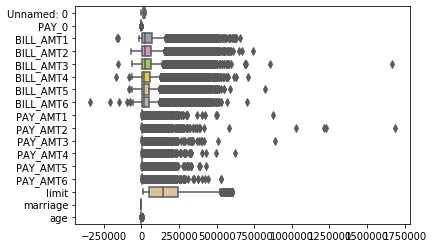

In [10]:
ax = sns.boxplot(data=credit, orient ='h', palette='Set2')

In [11]:
credit = credit[credit.BILL_AMT3< 400000]

credit = credit[credit.BILL_AMT4< 400000]
credit = credit[credit.BILL_AMT5< 400000]
credit = credit[credit.BILL_AMT2< 400000]
credit = credit[credit.BILL_AMT1< 400000]
credit = credit[credit.BILL_AMT6< 400000]
credit = credit[credit.PAY_AMT2 < 300000]
credit = credit[credit.limit< 575000]
credit = credit[credit.PAY_AMT1< 300000]
credit = credit[credit.PAY_AMT3< 300000]
credit = credit[credit.PAY_AMT4< 300000]
credit = credit[credit.PAY_AMT5< 300000]
credit = credit[credit.PAY_AMT6< 300000]

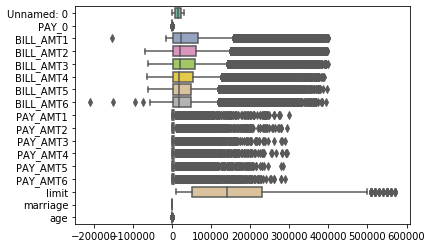

In [12]:
ax = sns.boxplot(data=credit, orient ='h', palette='Set2')

In [13]:
credit = pd.get_dummies(credit)
credit.head()

,Unnamed: 0,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_AMT6,limit,marriage,age,default_default,default_not default,education_graduate school,education_high school,education_other,education_university
0,0,2,3913,3102,689,0,0,0,0,689,...,0,20000,1,24,1,0,0,0,0,1
1,1,0,2682,1725,2682,3272,3455,3261,0,1000,...,2000,120000,2,26,1,0,0,0,0,1
2,2,0,29239,14027,13559,14331,14948,15549,1518,1500,...,5000,90000,2,34,0,1,0,0,0,1
3,3,0,46990,48233,49291,28314,28959,29547,2000,2019,...,1000,50000,1,37,0,1,0,0,0,1
4,4,0,8617,5670,35835,20940,19146,19131,2000,36681,...,679,50000,1,57,0,1,0,0,0,1


In [14]:
credit['grad_school']=credit['education_graduate school']
credit['high_school']=credit['education_high school']
credit['other_school']=credit['education_other']
credit['university']=credit['education_university']
credit['default']=credit['default_default']
credit['not_default']=credit['default_not default']
credit = credit.drop(['education_graduate school',
                      'education_high school',
                      'education_other',
                      'education_university',
                      'default_default',
                      'default_not default'], 
                     axis=1)

In [15]:
credit.describe()

,Unnamed: 0,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_AMT6,limit,marriage,age,grad_school,high_school,other_school,university,default,not_default
count,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,...,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000,29617.000000
mean,14987.826350,0.356788,48340.815410,46450.710842,44220.488976,40728.386940,38036.125570,36695.241550,5384.746294,5390.962994,...,4856.833136,163503.044873,1.552284,35.440153,0.350812,0.164703,0.015599,0.468886,0.221629,0.778371
std,8650.633579,0.758858,65173.620319,63085.288806,60668.713942,56791.527182,54019.789661,53141.350441,14056.775195,14643.093560,...,15269.488789,124504.101265,0.521981,9.210740,0.477232,0.370918,0.123921,0.499039,0.415350,0.415350
min,0.000000,0.000000,-154973.000000,-69777.000000,-61506.000000,-65167.000000,-61372.000000,-209051.000000,0.000000,0.000000,...,0.000000,10000.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7503.000000,0.000000,3492.000000,2947.000000,2629.000000,2298.000000,1738.000000,1221.000000,1000.000000,820.000000,...,100.000000,50000.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14989.000000,0.000000,21936.000000,20818.000000,19888.000000,18887.000000,17950.000000,16791.000000,2100.000000,2000.000000,...,1500.000000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,22465.000000,0.000000,65226.000000,62061.000000,58743.000000,52402.000000,49339.000000,48433.000000,5000.000000,5000.000000,...,4000.000000,230000.000000,2.000000,41.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,29999.000000,8.000000,399099.000000,397332.000000,398634.000000,387706.000000,395430.000000,394932.000000,298887.000000,294318.000000,...,290000.000000,570000.000000,3.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'PAY_0'),
 Text(2.5, 0, 'BILL_AMT1'),
 Text(3.5, 0, 'BILL_AMT2'),
 Text(4.5, 0, 'BILL_AMT3'),
 Text(5.5, 0, 'BILL_AMT4'),
 Text(6.5, 0, 'BILL_AMT5'),
 Text(7.5, 0, 'BILL_AMT6'),
 Text(8.5, 0, 'PAY_AMT1'),
 Text(9.5, 0, 'PAY_AMT2'),
 Text(10.5, 0, 'PAY_AMT3'),
 Text(11.5, 0, 'PAY_AMT4'),
 Text(12.5, 0, 'PAY_AMT5'),
 Text(13.5, 0, 'PAY_AMT6'),
 Text(14.5, 0, 'limit'),
 Text(15.5, 0, 'marriage'),
 Text(16.5, 0, 'age'),
 Text(17.5, 0, 'grad_school'),
 Text(18.5, 0, 'high_school'),
 Text(19.5, 0, 'other_school'),
 Text(20.5, 0, 'university'),
 Text(21.5, 0, 'default'),
 Text(22.5, 0, 'not_default')]

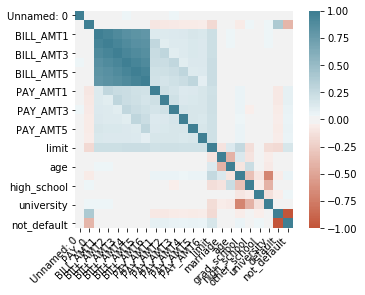

In [16]:
corr = credit.corr()
ax = sns.heatmap(corr, 
                 vmin =-1, 
                 vmax=1, 
                 center=0, 
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True
                )
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

In [17]:
corr_matrix = credit.corr()
corr_matrix['limit'].sort_values(ascending=False)

limit           1.000000
grad_school     0.261932
BILL_AMT5       0.239969
BILL_AMT4       0.235326
BILL_AMT6       0.233848
BILL_AMT1       0.226036
BILL_AMT3       0.224876
BILL_AMT2       0.219942
PAY_AMT3        0.213908
PAY_AMT2        0.213210
PAY_AMT6        0.210038
PAY_AMT5        0.204703
PAY_AMT4        0.201226
PAY_AMT1        0.195396
not_default     0.158402
age             0.138477
Unnamed: 0      0.025904
other_school    0.014308
marriage       -0.111020
high_school    -0.141925
university     -0.148551
default        -0.158402
PAY_0          -0.177787
Name: limit, dtype: float64

In [18]:
credit = credit.drop(['other_school'], axis=1)

In [19]:
#  try different scales to find the most suitable

In [20]:
x = pd.DataFrame({
    "Bill6": credit.BILL_AMT6,
    "Bill5": credit.BILL_AMT5,
    'Bill4': credit.BILL_AMT4,
    'Bill3': credit.BILL_AMT3,
    'Bill2': credit.BILL_AMT2,
    'Bill1': credit.BILL_AMT1,
    'Pay6': credit.PAY_AMT6,
    'Pay5': credit.PAY_AMT5,
    'Pay4': credit.PAY_AMT4,
    'Pay3': credit.PAY_AMT3,
    'Pay2': credit.PAY_AMT2,
    'Pay1': credit.PAY_AMT1,
    'not default': credit.not_default,
    'default': credit.default,
    'age': credit.age,
    'ed_high school': credit.high_school,
    'ed_university': credit.university,
    'ed_graduate school': credit.grad_school,
    'ontime': credit.PAY_0,
    
    
})

In [21]:
x.columns


Index(['Bill6', 'Bill5', 'Bill4', 'Bill3', 'Bill2', 'Bill1', 'Pay6', 'Pay5',
       'Pay4', 'Pay3', 'Pay2', 'Pay1', 'not default', 'default', 'age',
       'ed_high school', 'ed_university', 'ed_graduate school', 'ontime'],
      dtype='object')

In [22]:
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['Bill6','Bill5','Bill4','Bill3','Bill2','Bill1', 
                                                          'Pay6', 'Pay5', 'Pay4', 'Pay3', 'Pay2','Pay1',
                                                          'not default', 'default', 'age','ed_high school','ed_university', 'ed_graduate school',
                                                          'ontime'])
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=['Bill6','Bill5','Bill4','Bill3','Bill2','Bill1', 
                                                          'Pay6', 'Pay5', 'Pay4', 'Pay3', 'Pay2','Pay1',
                                                          'not default', 'default', 'age','ed_high school','ed_university', 'ed_graduate school',
                                                        'ontime'])

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['Bill6','Bill5','Bill4','Bill3','Bill2','Bill1', 
                                                          'Pay6', 'Pay5', 'Pay4', 'Pay3', 'Pay2','Pay1',
                                                          'not default', 'default', 'age','ed_high school','ed_university', 'ed_graduate school',
                                                          'ontime'])


C:\conda\envs\sherri\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\conda\envs\sherri\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\conda\envs\sherri\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\conda\envs\sherri\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\conda\envs\sherri\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\conda\envs\sherri\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data i

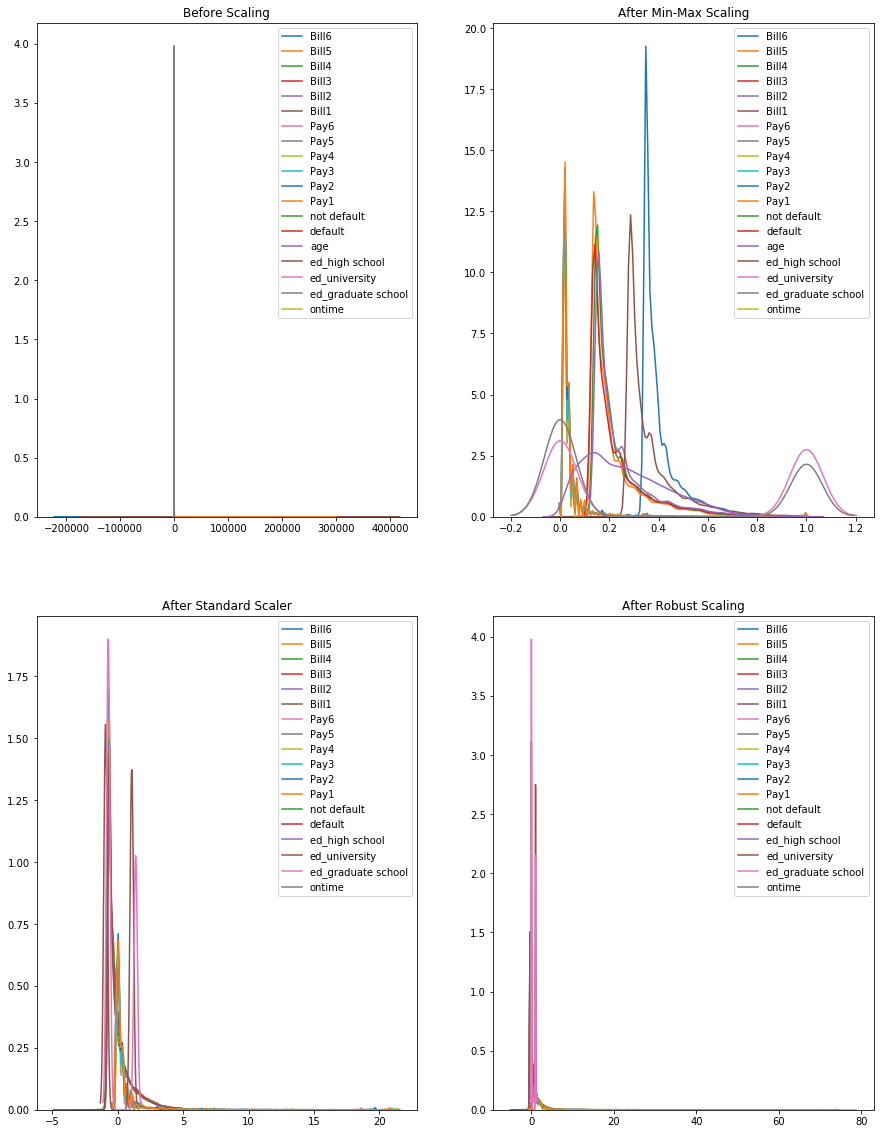

In [23]:

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2,figsize=(15,20))
ax1.set_title('Before Scaling')
sns.kdeplot(x['Bill6'], ax=ax1)
sns.kdeplot(x['Bill5'], ax=ax1)
sns.kdeplot(x['Bill4'], ax=ax1)
sns.kdeplot(x['Bill3'], ax=ax1)
sns.kdeplot(x['Bill2'], ax=ax1)
sns.kdeplot(x['Bill1'], ax=ax1)
sns.kdeplot(x['Pay6'], ax=ax1)
sns.kdeplot(x['Pay5'], ax=ax1)
sns.kdeplot(x['Pay4'], ax=ax1)
sns.kdeplot(x['Pay3'], ax=ax1)
sns.kdeplot(x['Pay2'], ax=ax1)              
sns.kdeplot(x['Pay1'], ax=ax1)    
sns.kdeplot(x['not default'], ax=ax1)             
sns.kdeplot(x['default'], ax=ax1)              
sns.kdeplot(x['age'], ax=ax1)
sns.kdeplot(x['ed_high school'], ax=ax1)
sns.kdeplot(x['ed_university'], ax=ax1)
sns.kdeplot(x['ed_graduate school'], ax=ax1)
sns.kdeplot(x['ontime'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['Bill6'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Bill5'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Bill4'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Bill3'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Bill2'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Bill1'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Pay6'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Pay5'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Pay4'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Pay3'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Pay2'], ax=ax2)
sns.kdeplot(minmax_scaled_df['Pay1'], ax=ax2)
sns.kdeplot(minmax_scaled_df['not default'], ax=ax2)
sns.kdeplot(minmax_scaled_df['default'], ax=ax2)
sns.kdeplot(minmax_scaled_df['age'], ax=ax2)
sns.kdeplot(minmax_scaled_df['ed_high school'], ax=ax2)
sns.kdeplot(minmax_scaled_df['ed_university'], ax=ax2)
sns.kdeplot(minmax_scaled_df['ed_graduate school'], ax=ax2)
sns.kdeplot(minmax_scaled_df['ontime'], ax=ax2)

ax3.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['Bill6'], ax=ax3)
sns.kdeplot(scaled_df['Bill5'], ax=ax3)
sns.kdeplot(scaled_df['Bill4'], ax=ax3)
sns.kdeplot(scaled_df['Bill3'], ax=ax3)
sns.kdeplot(scaled_df['Bill2'], ax=ax3)
sns.kdeplot(scaled_df['Bill1'], ax=ax3)
sns.kdeplot(scaled_df['Pay6'], ax=ax3)
sns.kdeplot(scaled_df['Pay5'], ax=ax3)
sns.kdeplot(scaled_df['Pay4'], ax=ax3)
sns.kdeplot(scaled_df['Pay3'], ax=ax3)
sns.kdeplot(scaled_df['Pay2'], ax=ax3)
sns.kdeplot(scaled_df['Pay1'], ax=ax3)
sns.kdeplot(scaled_df['not default'], ax=ax3)
sns.kdeplot(scaled_df['default'], ax=ax3)
sns.kdeplot(scaled_df['ed_high school'], ax=ax3)  
sns.kdeplot(scaled_df['ed_university'], ax=ax3) 
sns.kdeplot(scaled_df['ed_graduate school'], ax=ax3) 
sns.kdeplot(scaled_df['ontime'], ax=ax3) 
    
ax4.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['Bill6'], ax=ax4)
sns.kdeplot(robust_scaled_df['Bill5'], ax=ax4)
sns.kdeplot(robust_scaled_df['Bill4'], ax=ax4)
sns.kdeplot(robust_scaled_df['Bill3'], ax=ax4)
sns.kdeplot(robust_scaled_df['Bill2'], ax=ax4)
sns.kdeplot(robust_scaled_df['Bill1'], ax=ax4)
sns.kdeplot(robust_scaled_df['Pay6'], ax=ax4)
sns.kdeplot(robust_scaled_df['Pay5'], ax=ax4)
sns.kdeplot(robust_scaled_df['Pay4'], ax=ax4)
sns.kdeplot(robust_scaled_df['Pay3'], ax=ax4)
sns.kdeplot(robust_scaled_df['Pay2'], ax=ax4)
sns.kdeplot(robust_scaled_df['Pay1'], ax=ax4)
sns.kdeplot(robust_scaled_df['not default'], ax=ax4)
sns.kdeplot(robust_scaled_df['default'], ax=ax4)
sns.kdeplot(robust_scaled_df['ed_high school'], ax=ax4)
sns.kdeplot(robust_scaled_df['ed_university'], ax=ax4)
sns.kdeplot(robust_scaled_df['ed_graduate school'], ax=ax4)
sns.kdeplot(robust_scaled_df['ontime'], ax=ax4)

plt.show()    

In [24]:
# not real sure which schaler is the best for this dataset

In [25]:
# predictor and target split

In [31]:
X = credit.drop(['limit', 'Unnamed: 0'], axis=1)
y = credit['limit']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [33]:

# Import the relevant packages

from sklearn.linear_model import LinearRegression
#import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [34]:
# Linear Regression
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break  
        
print('The selected features are :', selected_features)

The selected features are : ['PAY_0', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'marriage', 'age', 'grad_school', 'high_school', 'university', 'default', 'not_default']


In [35]:
print(model.pvalues)

const           4.736045e-50
PAY_0           9.726965e-68
BILL_AMT1       3.800063e-30
BILL_AMT2       1.793538e-02
BILL_AMT3       4.108650e-04
BILL_AMT5       4.442352e-11
PAY_AMT1        4.581173e-38
PAY_AMT2        4.633089e-49
PAY_AMT3        5.951283e-39
PAY_AMT4        2.086677e-33
PAY_AMT5        4.708025e-63
PAY_AMT6        3.160888e-70
marriage        1.912713e-66
age            2.065728e-112
grad_school     3.693191e-22
high_school     1.790395e-13
university      2.613539e-02
default         3.278210e-19
not_default     1.816860e-82
dtype: float64


# XGboost
tuned_parameters = [{'max_depth': [5,10, 15, 20, 25, 30],'learning_rate':[0.001, 0.01, 0.1, 0.5], 'n_estimators': [100,150,200, 250, 300]}]
MSE_xgb = ['mean_squared_error(y_test,y_pred2)']
for value in MSE_xgb:
    regr = GridSearchCV(xgb.XGBRegressor(silent = True), tuned_parameters, cv=4)
    regr.fit(X_train, y_train)
    y_true, y_pred2 = y_test, regr.predict(X_test)
    
print('The best hyper-parameters for XGBBoost are: ',regr.best_params_)

# AdaBoost
tuned_parameters = [{'learning_rate': [0.1,1,2,3,4,5], 'n_estimators': [100,200,300, 400, 500]}]
MSE_ada = ['mean_squared_error(y_test,y_pred3)']
for value in MSE_ada:
    adaregr = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=4)
    adaregr.fit(X_train, y_train)
    y_true, y_pred3 = y_test, adaregr.predict(X_test)
    
print('The best hyper-parameters for AdaBoost are: ', adaregr.best_params_ )

# Decision Tree
tuned_parameters = [{'max_depth': [1,2,3,4,5,10, 15, 20, 25, 50, 100,200]}]
MSE_dt = ['mean_squared_error(y_test,y_pred4)']
for value in MSE_dt:
    regressor_dt = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=4)
    regressor_dt.fit(X_train, y_train)
    y_true, y_pred4 = y_test, regressor_dt.predict(X_test)
    
print('The optimum max_depth for Decision Tree is: ', regressor_dt.best_params_ )

# Random Forests
tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train)
    y_true, y_pred5 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)

# KNN
scaler = preprocessing.RobustScaler()                         # Features Scaling is required for distance-based algorithms
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

tuned_parameters = [{'n_neighbors': [1,2,3,4,5,10,15,20], 'p': [1,2]}]
MSE_knn = ['mean_squared_error(y_test,y_pred)']
for i in MSE_knn:
    model = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=4)
    model.fit(X_train_scaled, y_train)
    y_true, y_pred6 = y_test, model.predict(X_test_scaled)
    
print('The best hyper-parameters for KNN are: ', model.best_params_)

# SVM
#tuned_parameters = [{'kernel': ['linear', 'rbf', 'poly'], 'C':[1, 2, 3, 5, 6, 7, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}]
#MSE_svm = ['mean_squared_error(y_test,y_pred7)']
#for value in MSE_svm:
#    svr_regr = GridSearchCV(SVR(), tuned_parameters, cv=4)
#    svr_regr.fit(X_train_scaled, y_train)
#    y_true, y_pred7 = y_test, svr_regr.predict(X_test_scaled)
    
#print('The best hyper-parameters for SVR are: ', svr_regr.best_params_)

In [38]:
scaler = preprocessing.RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [39]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# XGBoost
#regr = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=150, random_state = 0, silent = True)
#regr.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# AdaBoost
adaregr = AdaBoostRegressor(random_state=123, learning_rate = 0.1, n_estimators=100)
adaregr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=100, random_state=123)

In [41]:
# Decision Tree
regressor_dt = DecisionTreeRegressor(random_state=123, max_depth = 5)
regressor_dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [42]:
# Random Forests
regr_rf = RandomForestRegressor(max_depth=15, random_state=125,
                             n_estimators=250)
regr_rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=125, verbose=0, warm_start=False)

In [43]:

# KNN
neigh = KNeighborsRegressor(n_neighbors = 20, metric = 'minkowski', p = 1)
neigh.fit(X_train_scaled, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=1,
                    weights='uniform')

In [80]:
# SVR
svr_regr = SVR(gamma=0.0001, kernel = 'linear', C =0.01, epsilon=150000)
svr_regr.fit(X_train_scaled, y_train)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=150000, gamma=0.0001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:

# Predict price using the models above

In [81]:
y_pred1 = regressor.predict(X_test_scaled)    # Linear regression
#y_pred2 = regr.predict(X_test)                # XGBoost
y_pred3 = adaregr.predict(X_test)             # AdaBoost
y_pred4 = regressor_dt.predict(X_test)        # Decision Tree
y_pred5 = regr_rf.predict(X_test)             # Random Forests
y_pred6 = neigh.predict(X_test_scaled)        # KNN
y_pred7 = svr_regr.predict(X_test_scaled)     # SVR

In [77]:
# Find R Squared (R^2) Values

In [82]:

print('The R^2 value for Linear Regression is        :', round((r2_score(y_test,y_pred1)), 3))
#print('The R^2 value for XGBoost Regressor is        :', round((r2_score(y_test,y_pred2)), 3))
print('The R^2 value for AdaBoost Regressor is       :', round((r2_score(y_test,y_pred3)), 3))
print('The R^2 value for Decision Tree Regressor is  :', round((r2_score(y_test,y_pred4)), 3))
print('The R^2 value for Random Forests Regressor is :', round((r2_score(y_test,y_pred5)), 3))
print('The R^2 value for KNN Regressor is            :', round((r2_score(y_test,y_pred6)), 3))
print('The R^2 value for SVM Regressor is            :', round((r2_score(y_test,y_pred7)), 3))

The R^2 value for Linear Regression is        : 0.256
The R^2 value for AdaBoost Regressor is       : 0.295
The R^2 value for Decision Tree Regressor is  : 0.349
The R^2 value for Random Forests Regressor is : 0.45
The R^2 value for KNN Regressor is            : 0.4
The R^2 value for SVM Regressor is            : -0.015


In [49]:
# Find adjusted R Squared (Adj R2) Values

In [73]:

print('The Adj R2 value for Linear Regression is        :', round((1 - (1-r2_score(y_test,y_pred1))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
#print('The Adj R2 value for XGBoost Regressor is        :', round((1 - (1-r2_score(y_test,y_pred2))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for AdaBoost Regressor is       :', round((1 - (1-r2_score(y_test,y_pred3))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Decision Tree Regressor is  :', round((1 - (1-r2_score(y_test,y_pred4))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Random Forests Regressor is :', round((1 - (1-r2_score(y_test,y_pred5))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for KNN Regressor is            :', round((1 - (1-r2_score(y_test,y_pred6))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for SVM Regressor is            :', round((1 - (1-r2_score(y_test,y_pred7))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))

The Adj R2 value for Linear Regression is        : 0.255
The Adj R2 value for AdaBoost Regressor is       : 0.294
The Adj R2 value for Decision Tree Regressor is  : 0.348
The Adj R2 value for Random Forests Regressor is : 0.45
The Adj R2 value for KNN Regressor is            : 0.4
The Adj R2 value for SVM Regressor is            : 0.137


In [51]:
# Find Mean Squared Errors (MSE) and Root Mean Squared Errors (RMSE)

In [52]:
MSE_lr  = mean_squared_error(y_test,y_pred1)
#MSE_xgb = mean_squared_error(y_test,y_pred2)
MSE_ada = mean_squared_error(y_test,y_pred3)
MSE_dt  = mean_squared_error(y_test,y_pred4)
MSE_rf  = mean_squared_error(y_test,y_pred5)
MSE_knn = mean_squared_error(y_test,y_pred6)
MSE_svr = mean_squared_error(y_test,y_pred7)

In [53]:
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));
#print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));
print('The RMSE value for AdaBoost Regressor is       :', round(np.sqrt(MSE_ada)));
print('The RMSE value for Decision Tree Regressor is  :', round(np.sqrt(MSE_dt)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));
print('The RMSE value for KNN Regressor is            :', round(np.sqrt(MSE_knn)));
print('The RMSE value for SVM Regressor is            :', round(np.sqrt(MSE_svr)));

The RMSE value for Linear Regression is        : 107143.0
The RMSE value for AdaBoost Regressor is       : 104309.0
The RMSE value for Decision Tree Regressor is  : 100233.0
The RMSE value for Random Forests Regressor is : 92113.0
The RMSE value for KNN Regressor is            : 96187.0
The RMSE value for SVM Regressor is            : 115314.0


In [54]:
# Plot the actual vs predicted prices

Text(0.5, 1.0, 'Linear Regression')

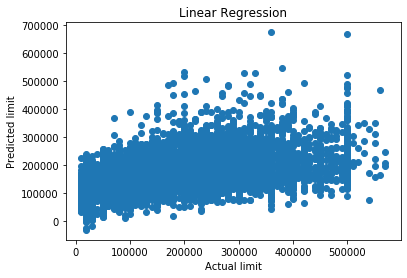

In [61]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual limit")
plt.ylabel("Predicted limit")
plt.title("Linear Regression")

Text(0.5, 1.0, 'Adaboost')

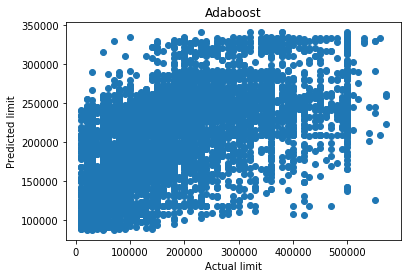

In [62]:
plt.scatter(y_test, y_pred3)
plt.xlabel("Actual limit")
plt.ylabel("Predicted limit")
plt.title("Adaboost")

Text(0.5, 1.0, 'Decision Tree')

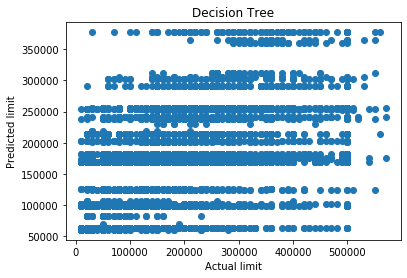

In [63]:
plt.scatter(y_test, y_pred4)
plt.xlabel("Actual limit")
plt.ylabel("Predicted limit")
plt.title("Decision Tree")

Text(0.5, 1.0, 'Random Forest')

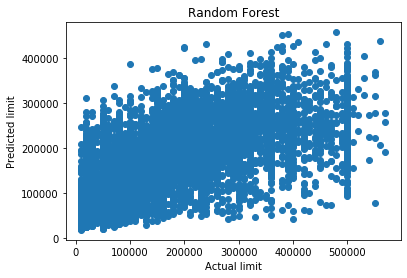

In [64]:
plt.scatter(y_test, y_pred5)
plt.xlabel("Actual limit")
plt.ylabel("Predicted limit")
plt.title("Random Forest")

Text(0.5, 1.0, 'KNN')

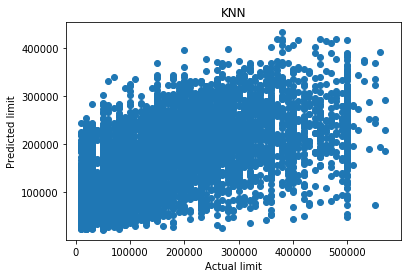

In [65]:
plt.scatter(y_test, y_pred6)
plt.xlabel("Actual limit")
plt.ylabel("Predicted limit")
plt.title("KNN")

Text(0.5, 1.0, 'SVM')

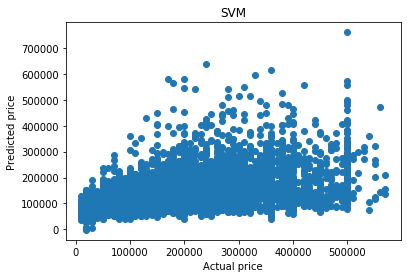

In [60]:

plt.scatter(y_test, y_pred7)
plt.xlabel("Actual limit")
plt.ylabel("Predicted limit")
plt.title("SVM")